In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gp

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data() 


# Correction 35

In [4]:
merged = gp.Util.view_labels(input_rhoana[8], [68,70], crop=False, return_it=True)
split = np.array(merged)

In [5]:
merged[merged==1] = 2

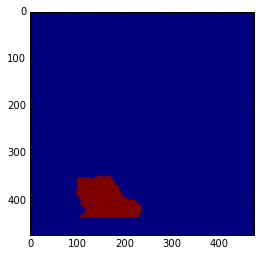

In [6]:
imshow(merged)

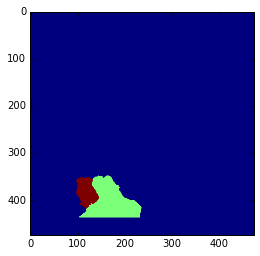

In [7]:
imshow(split)

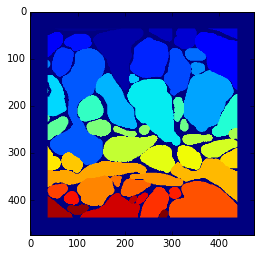

In [8]:
imshow(input_gold[8])

In [9]:
# bjoern's VI
import partition_comparison
print 'VI merged<->gold', partition_comparison.variation_of_information(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'VI split<->gold', partition_comparison.variation_of_information(split.astype(np.uint32).ravel(), input_gold[8].ravel())

VI merged<->gold 0.978171098737
VI split<->gold 1.10395484954


In [10]:
# bjoern's RandIndex
print 'RI merged<->gold', partition_comparison.rand_index(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'RI split<->gold', partition_comparison.rand_index(split.astype(np.uint32).ravel(), input_gold[8].ravel())

RI merged<->gold 0.439400852144
RI split<->gold 0.596875414374


In [11]:
# ITTK VI (https://github.com/MaxwellRebo/ittk/blob/master/ittk/main.py)
import sys
sys.path.append('../ittk/')
from ittk import main
print 'VI merged<->gold', main.information_variation(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'VI split<->gold', main.information_variation(split.astype(np.uint32).ravel(), input_gold[8].ravel())

VI merged<->gold 3.94738092242
VI split<->gold 3.95625089214


In [12]:
# GALA VI
from gala import evaluate
print 'VI merged<->gold', evaluate.vi(merged, input_gold[8])
print 'VI split<->gold', evaluate.vi(split, input_gold[8])

VI merged<->gold 1.41120259329
VI split<->gold 1.5926701868


# Correction 137

In [13]:
merged = gp.Util.view_labels(input_rhoana[8], [20,31], crop=False, return_it=True)
split = np.array(merged)

In [14]:
merged[merged==1] = 2

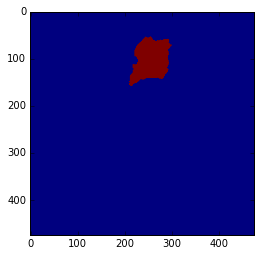

In [15]:
imshow(merged)

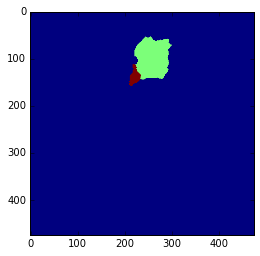

In [16]:
imshow(split)

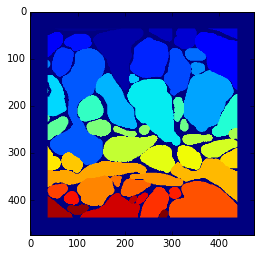

In [17]:
imshow(input_gold[8])

In [18]:
# bjoern's VI
import partition_comparison
print 'VI merged<->gold', partition_comparison.variation_of_information(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'VI split<->gold', partition_comparison.variation_of_information(split.astype(np.uint32).ravel(), input_gold[8].ravel())

VI merged<->gold 0.296182794935
VI split<->gold 0.300971153114


In [19]:
# bjoern's RandIndex
print 'RI merged<->gold', partition_comparison.rand_index(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'RI split<->gold', partition_comparison.rand_index(split.astype(np.uint32).ravel(), input_gold[8].ravel())

RI merged<->gold 0.87015139617
RI split<->gold 0.90710470789


In [20]:
# ITTK VI (https://github.com/MaxwellRebo/ittk/blob/master/ittk/main.py)
import sys
sys.path.append('../ittk/')
from ittk import main
print 'VI merged<->gold', main.information_variation(merged.astype(np.uint32).ravel(), input_gold[8].ravel())
print 'VI split<->gold', main.information_variation(split.astype(np.uint32).ravel(), input_gold[8].ravel())

VI merged<->gold 3.98987632864
VI split<->gold 3.99189470067


In [21]:
# GALA VI
from gala import evaluate
print 'VI merged<->gold', evaluate.vi(merged, input_gold[8])
print 'VI split<->gold', evaluate.vi(split, input_gold[8])

VI merged<->gold 0.42730144945
VI split<->gold 0.434209590048


In [22]:
print 'VI split<->gold', evaluate.vi(split, input_gold[8])

VI split<->gold 0.434209590048


In [23]:
print 'VI split<->gold', evaluate.vi(split.ravel(), input_gold[8].ravel())

VI split<->gold 0.434209590048
